## Exploratory Data Analysis, Corelation Matrix,Open Price Analysis

In [ ]:
import pandas as pd

#Load the data from the Excel file
file_path = "FTSE 100 Historical Data - Checked.xlsx"
df = pd.read_excel(file_path)

#Display basic summary statistics
summary_stats = df.describe()

#Stats of the dataset
print("Basic Summary Statistics:")
print(summary_stats)

Basic Summary Statistics:
                                Date        Price         Open         High  \
count                           5761  5761.000000  5761.000000  5761.000000   
mean   2012-05-29 14:52:20.704738816  6053.810194  6053.683385  6092.933076   
min              2001-01-03 00:00:00  3287.000000  3287.000000  3466.400000   
25%              2006-09-15 00:00:00  5299.900000  5299.100000  5342.100000   
50%              2012-05-31 00:00:00  6098.700000  6098.700000  6145.830000   
75%              2018-02-09 00:00:00  6952.860000  6952.590000  7001.270000   
max              2023-10-25 00:00:00  8014.310000  8014.310000  8047.060000   
std                              NaN  1073.474901  1073.362288  1071.309093   

               Low     Change %  
count  5761.000000  5761.000000  
mean   6013.122427     0.000100  
min    3277.500000    -0.108700  
25%    5256.610000    -0.005100  
50%    6053.350000     0.000500  
75%    6911.800000     0.005700  
max    7995.460000     0

In [ ]:
#Display information about the dataset
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5761 non-null   datetime64[ns]
 1   Price     5761 non-null   float64       
 2   Open      5761 non-null   float64       
 3   High      5761 non-null   float64       
 4   Low       5761 non-null   float64       
 5   Vol.      3080 non-null   object        
 6   Change %  5761 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 315.2+ KB
None


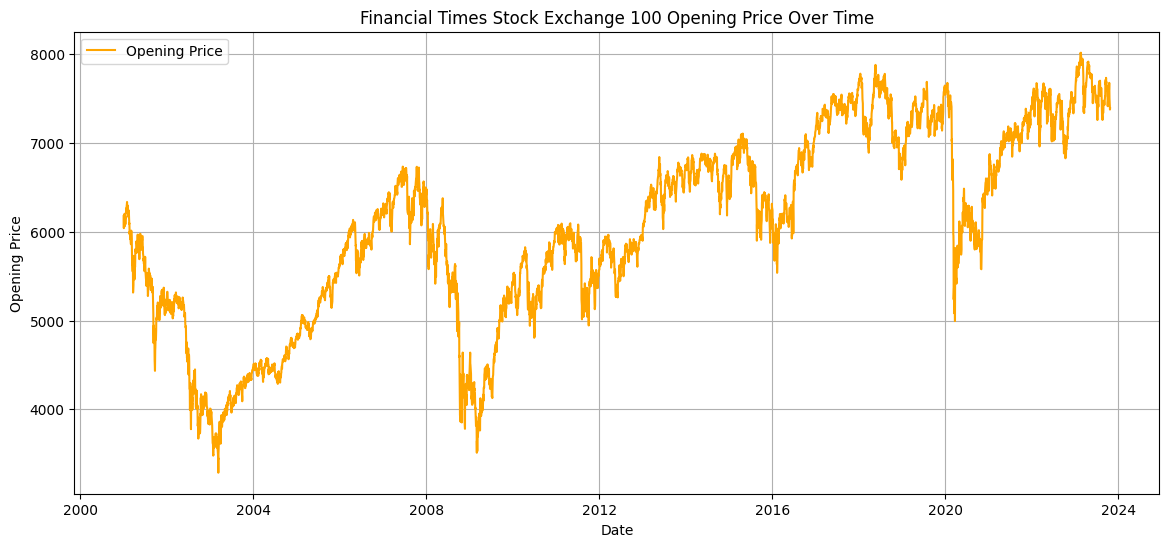

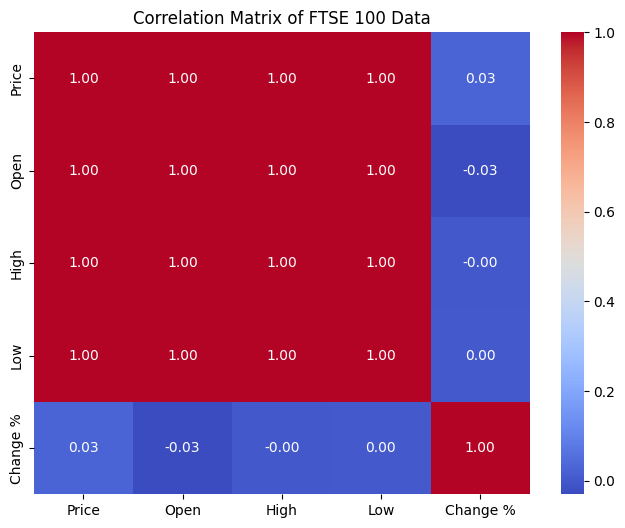

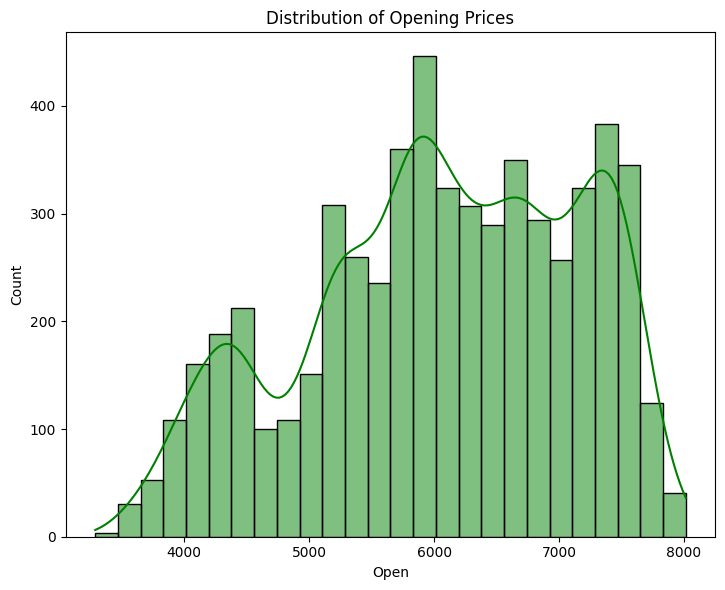

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data
file_path = 'FTSE 100 Historical Data - Checked.xlsx'
data = pd.read_excel(file_path)

#Plotting the Opening price over time
#A visual representation of the "Open" price trend over time to observe fluctuations, trends, or anomalies.
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Open'], label='Opening Price', color='orange')
plt.title('Financial Times Stock Exchange 100 Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()
plt.grid(True)
plt.show()

#Correlation Matrix and Heatmap
#Helps to understand the linear relationship between different variables in the dataset.
corr_data = data.drop(columns=['Date', 'Vol.'])  # Assuming volume is non-numeric or not relevant in this context
correlation_matrix = corr_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of FTSE 100 Data')
plt.show()
#Distribution of Opening prices (Histogram) and Box Plot
#Histogram provides insights into the distribution, skewness, and potential anomalies in the "Open" prices.
#Box Plot provides a summary of the "Open" prices' central tendency and spread, along with potential outliers.
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Open'], kde=True, color='green')  # Changed color to green
plt.title('Distribution of Opening Prices')
plt.tight_layout()
plt.show()


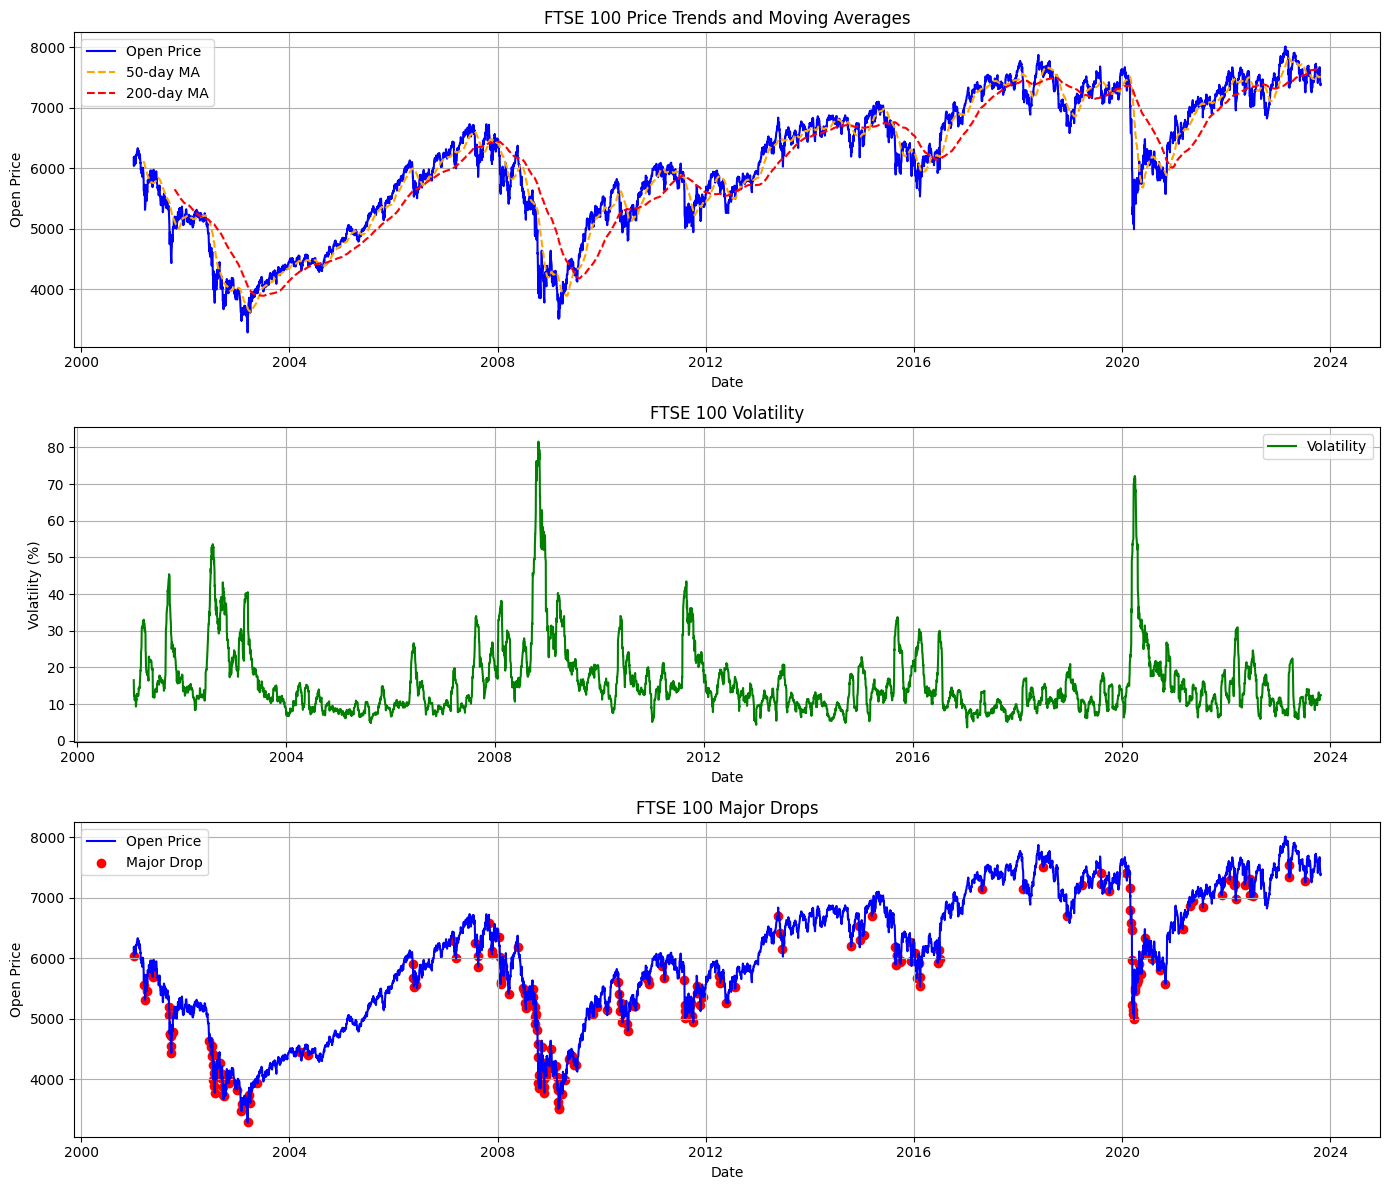

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load the data
file_path = 'FTSE 100 Historical Data - Checked.xlsx'
data = pd.read_excel(file_path)

#Calculate daily returns
data['Daily_Return'] = data['Open'].pct_change() * 100

#Calculate 50-day and 200-day moving averages
data['MA_50'] = data['Open'].rolling(window=50).mean()
data['MA_200'] = data['Open'].rolling(window=200).mean()

#Calculate volatility (annualized)
data['Volatility'] = data['Open'].pct_change().rolling(window=20).std() * np.sqrt(252) * 100

#Identify major drops (e.g., 2% decrease)
threshold = -2
major_drops = data[data['Daily_Return'] < threshold]

#Plotting
plt.figure(figsize=(14, 12))

#Price trends and moving averages
plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['Open'], label='Open Price', color='blue')
plt.plot(data['Date'], data['MA_50'], label='50-day MA', linestyle='--', color='orange')
plt.plot(data['Date'], data['MA_200'], label='200-day MA', linestyle='--', color='red')
plt.title('FTSE 100 Price Trends and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)

#Volatility
plt.subplot(3, 1, 2)
plt.plot(data['Date'], data['Volatility'], label='Volatility', color='green')
plt.title('FTSE 100 Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)

#Major drops
plt.subplot(3, 1, 3)
plt.plot(data['Date'], data['Open'], label='Open Price', color='blue')
plt.scatter(major_drops['Date'], major_drops['Open'], color='red', label='Major Drop')
plt.title('FTSE 100 Major Drops')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


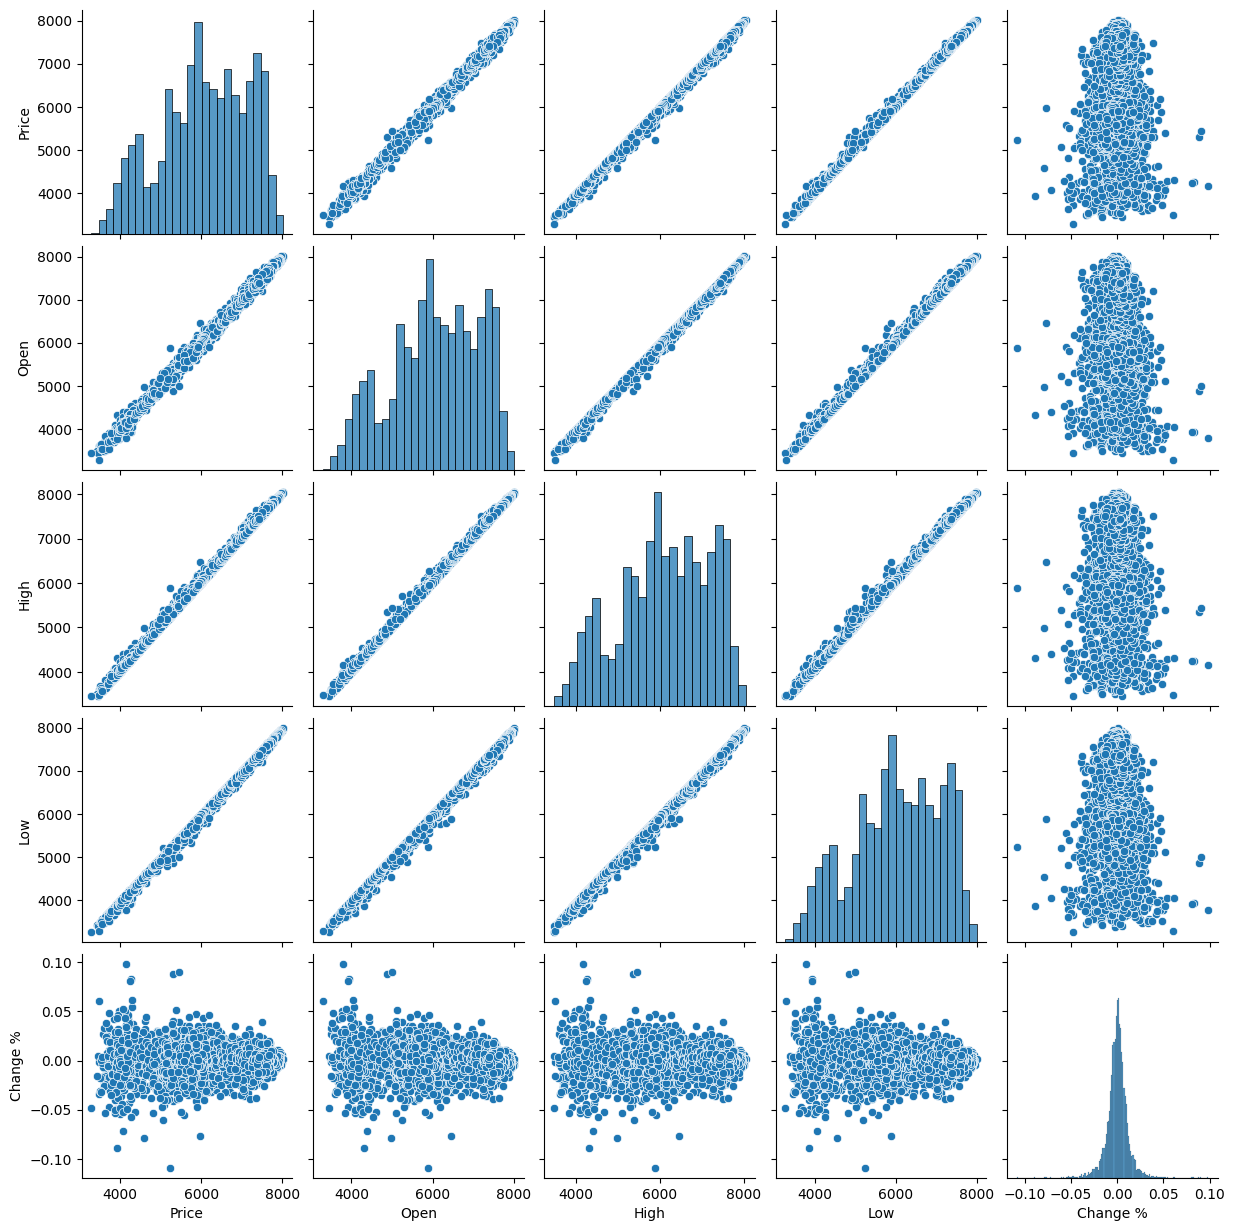

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'FTSE 100 Historical Data - Checked.xlsx'
data = pd.read_excel(file_path)

#Selecting numerical columns for the pair plot
numerical_columns = ['Price', 'Open', 'High', 'Low', 'Change %']
pairplot_data = data[numerical_columns]

#Created a pair plot
sns.pairplot(pairplot_data.dropna()) #dropna() ensures that null values are omitted
plt.show()

## LPPL  fit on the complete FTSE 100 Data

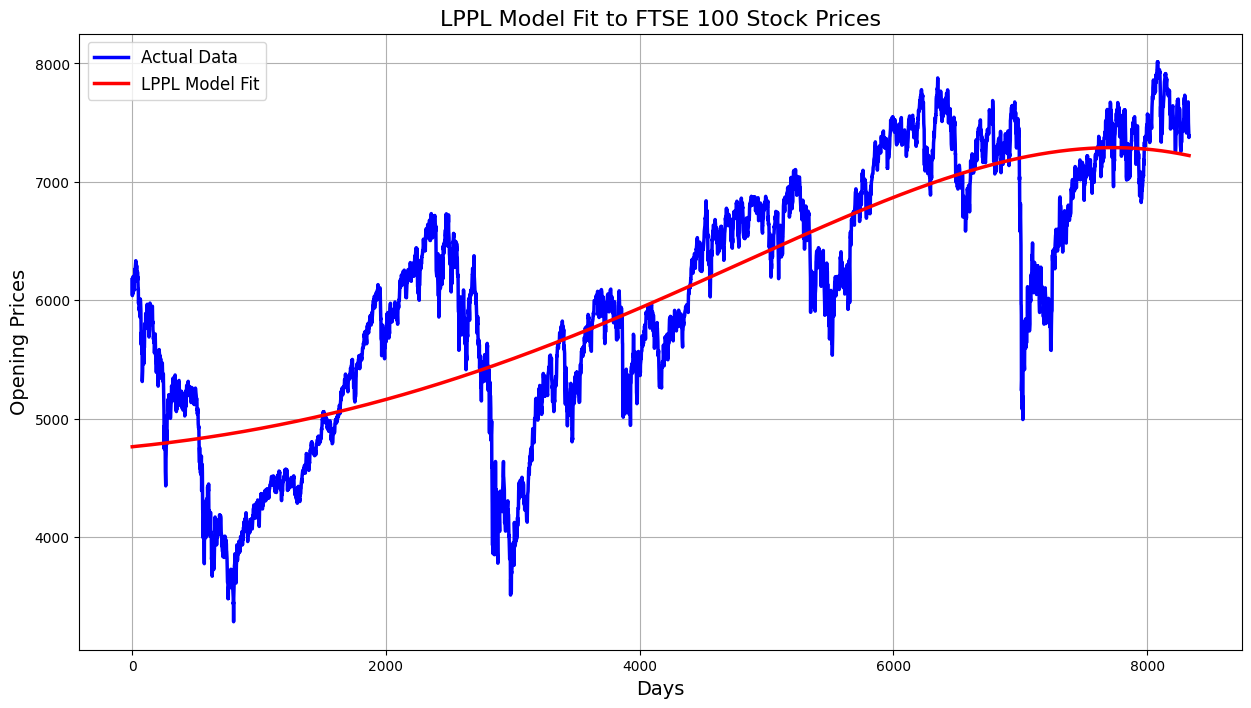

Estimated Parameters:
A: 38844.102541628075
B: -25366.183179374184
C: -710.5208663053244
m: 0.028034673414009673
omega: 4.095075285901625
phi: 1.6009677678124536
Mean Squared Error: 391517.38778614445


In [ ]:
#LPPL  fit on the complete FTSE 100 Data
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

#Function for loading and preprocessing stock data from an Excel file.
def load_data(file_path):
    #Read data from Excel file.
    data = pd.read_excel(file_path)
    #Convert dates to days since the earliest date in the dataset.
    data['Date'] = (data['Date'] - data['Date'].min()).dt.days
    #Return the processed date and 'Open' price values.
    return data['Date'].values, data['Open'].values

#Function defining the log-periodic power law (LPPL) model for stock prices.
def log_periodic_power_law(t, A, B, C, m, omega, phi, tc, buffer=10):
    epsilon = 1e-3  #Small constant to prevent log(0).
    mask = (tc - t) >= buffer  #Mask to handle values near critical time.
    output = np.full(t.shape, np.nan)  #Initialize output with NaNs.
    #Apply the LPPL model equation where valid.
    output[mask] = A + B * (tc - t[mask])**m + C * (tc - t[mask])**m * np.cos(omega * np.log(tc - t[mask] + epsilon) - phi)
    return output

#Objective function to calculate MSE between actual and predicted prices.
def objective_function(params, t, close_prices):
    #Unpack parameters and compute predictions.
    A, B, C, m, omega, phi, tc = params
    predictions = log_periodic_power_law(t, A, B, C, m, omega, phi, tc)
    # Return the mean squared error.
    return np.mean((close_prices - predictions) ** 2)

#Function to estimate LPPL model parameters using differential evolution.
def estimate_parameters(t, close_prices):
    #Define bounds for each parameter in the LPPL model.
    bounds = [(0, 1e5), (-1e5, 0), (-1e5, 1e5), (0, 1), (0, 2 * np.pi), (-2 * np.pi, 2 * np.pi), (max(t), 2 * max(t))]
    #Apply differential evolution algorithm to find the best parameters.
    result = differential_evolution(objective_function, bounds, args=(t, close_prices), strategy='best1bin', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7)
    return result

# function for plotting the actual data and the LPPL model fit.
def plot_results(t, close_prices, params):
    #Generate predictions using LPPL model.
    predicted_prices = log_periodic_power_law(t, *params)

    #Setting up the plot.
    plt.figure(figsize=(15, 8))
    plt.plot(t, close_prices, label='Actual Data', color='blue', linewidth=2.5)
    plt.plot(t, predicted_prices, label='LPPL Model Fit', color='red', linewidth=2.5)
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Opening Prices', fontsize=14)
    plt.title('LPPL Model Fit to FTSE 100 Stock Prices', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

#Main function to perform the analysis.
def analyze_stock_data(file_path):
    #Load and preprocess the data.
    t, close_prices = load_data(file_path)
    #Estimate parameters using differential evolution.
    result = estimate_parameters(t, close_prices)
    if result.success:
        #Plot results if parameter estimation is successful.
        plot_results(t, close_prices, result.x)
        #Calculate and print the mean squared error.
        mse = objective_function(result.x, t, close_prices)

        #Parameter names for better readability.
        param_names = ['A', 'B', 'C', 'm', 'omega', 'phi']
        #Print each parameter with its name and value.
        print("Estimated Parameters:")
        for name, value in zip(param_names, result.x):
            print(f"{name}: {value}")

        print("Mean Squared Error:", mse)
        return result.x, mse
    else:
        print("Parameter estimation did not converge successfully.")
        return None, None

file_path = 'FTSE 100 Historical Data - Checked.xlsx'
#Run the analysis and store the results.
estimated_params, mse = analyze_stock_data(file_path)


## Future prediction of stock market crash using LPPL

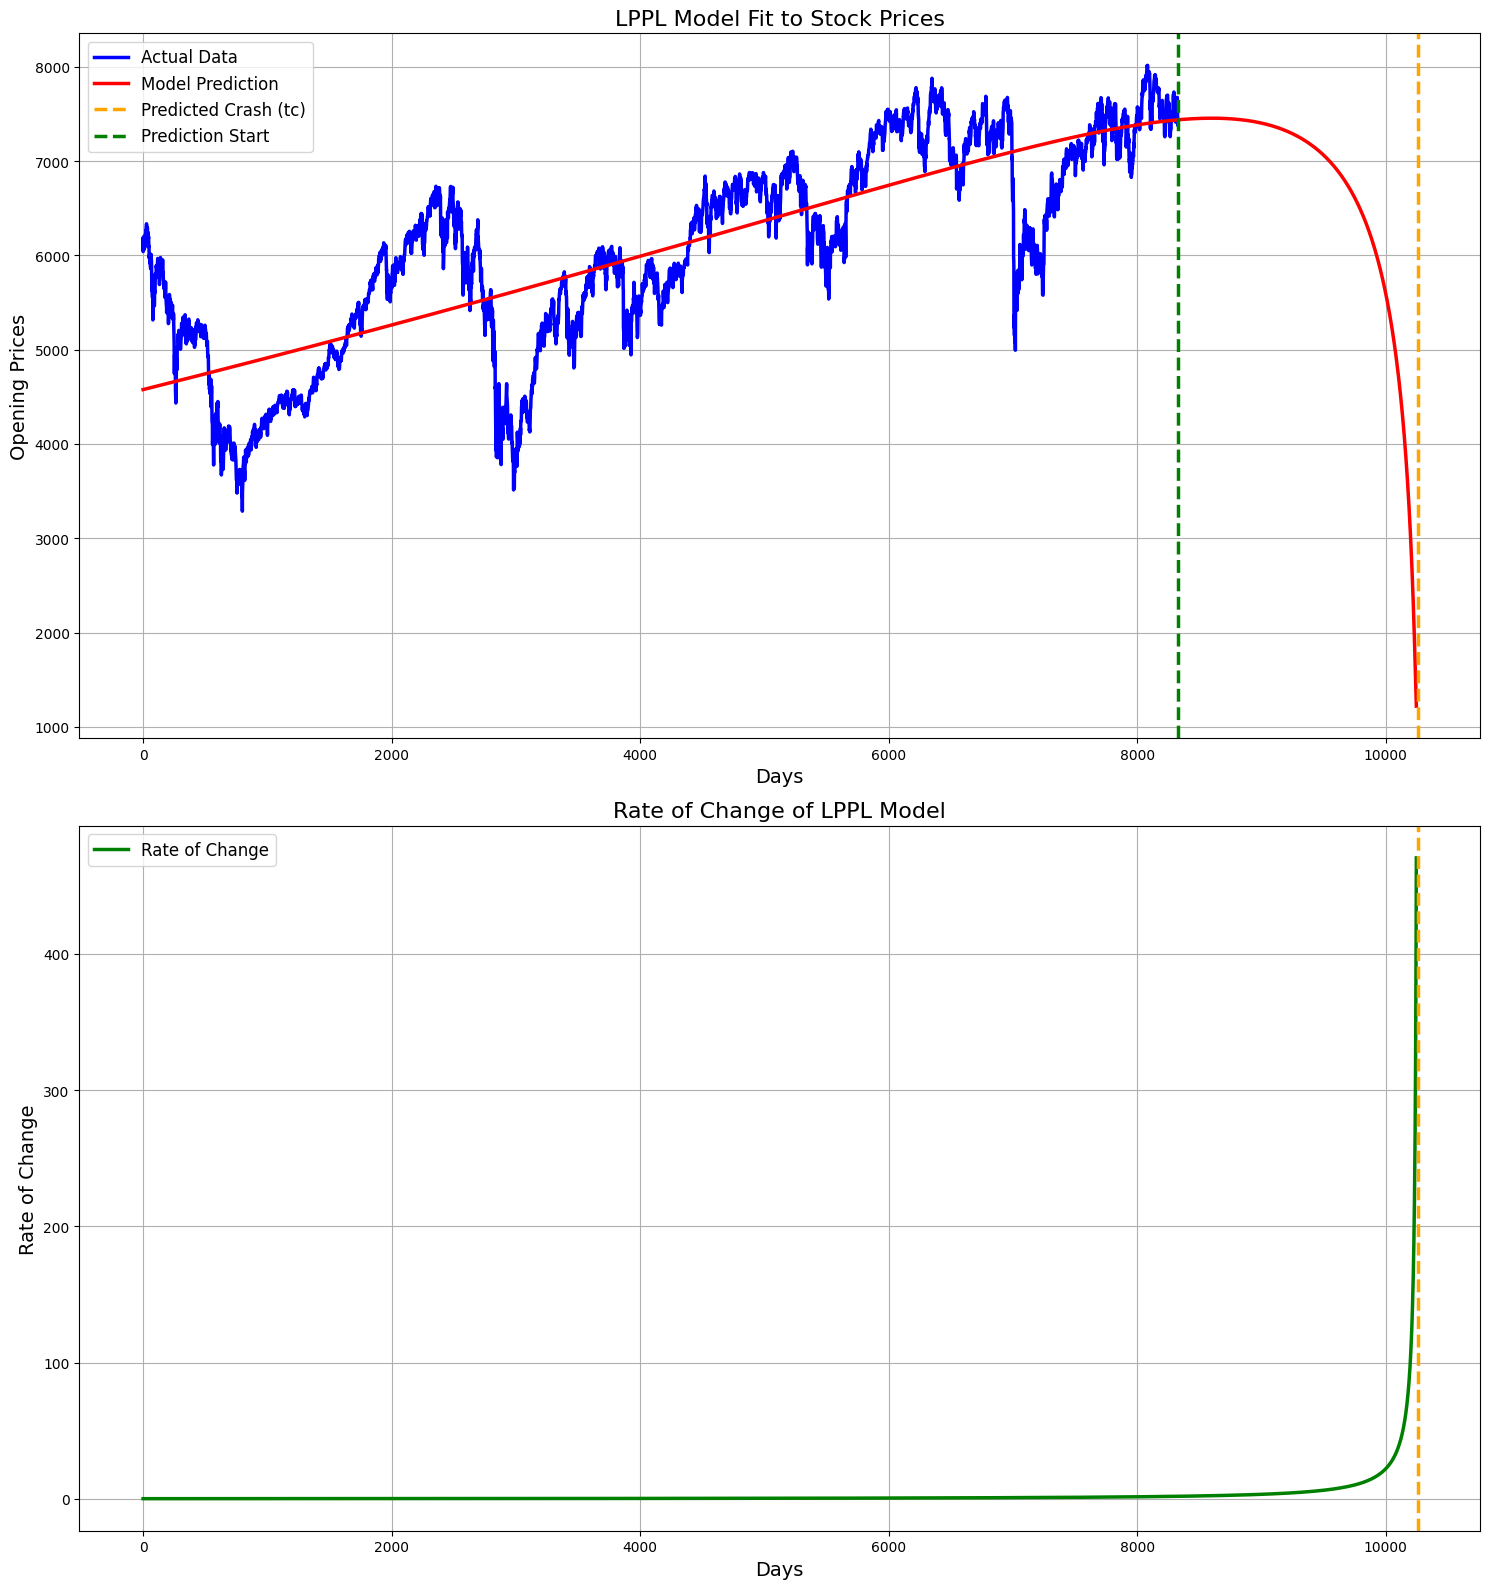

Estimated Parameters:
A: 33866.80214789162
B: -22979.834709326904
C: -7997.427933946701
m: 0.07088372169849393
omega: 0.35408857259575954
phi: -0.11559256163888423
tc: 10257.737470805496
Mean Squared Error: 402754.6930819266

Rate of Change Info (days before predicted crash):
30 days before tc: Rate of Change = 191.4334
60 days before tc: Rate of Change = 99.4454
90 days before tc: Rate of Change = 66.5783
Predicted Crash Date: 2029-08-25


In [ ]:
#future prediction of stock market crash using LPPL
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Function to load data from an Excel file and preprocess it.
def load_data(file_path):
    # Reading data from the specified Excel file.
    data = pd.read_excel(file_path)
    # Converting dates to numeric format, counting days since the earliest date.
    data['Date'] = (data['Date'] - data['Date'].min()).dt.days
    # Returning date and 'Open' price values.
    return data['Date'].values, data['Open'].values

# Function defining the log-periodic power law model for stock price movements.
def log_periodic_power_law(t, A, B, C, m, omega, phi, tc, buffer=10):
    epsilon = 1e-3  # To avoid the logarithm of zero.
    mask = (tc - t) >= buffer  # Avoiding issues near the critical time.
    output = np.full(t.shape, np.nan)  # Initializing with NaNs.
    # Applying the model equation.
    output[mask] = A + B * (tc - t[mask])**m + C * (tc - t[mask])**m * np.cos(omega * np.log(tc - t[mask] + epsilon) - phi)
    return output

#Function to compute the mean squared error between actual prices and model predictions.
def objective_function(params, t, close_prices):
    A, B, C, m, omega, phi, tc = params
    predictions = log_periodic_power_law(t, A, B, C, m, omega, phi, tc)
    return np.mean((close_prices - predictions) ** 2)

#Function to estimate the model parameters using differential evolution.
def estimate_parameters(t, close_prices):
    bounds = [(0, 1e5), (-1e5, 0), (-1e5, 1e5), (0, 1), (0, 2 * np.pi), (-2 * np.pi, 2 * np.pi), (max(t), 2 * max(t))]
    result = differential_evolution(objective_function, bounds, args=(t, close_prices), strategy='best1bin', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7)
    return result

def lppl_rate_of_change(t, A, B, C, m, omega, phi, tc):
    """
    Calculate the rate of change of the LPPL function at time t.
    """
    epsilon = 1e-3
    buffer = 10  # Buffer to avoid singularity near tc
    rate = np.full(t.shape, np.nan)  # Initialize with NaNs

    valid_mask = (tc - t) > buffer
    rate[valid_mask] = -m * B * (tc - t[valid_mask])** (m-1) - \
                       m * C * (tc - t[valid_mask]) ** (m-1) * np.cos(omega * np.log(tc - t[valid_mask] + epsilon) - phi) - \
                       C * omega * (tc - t[valid_mask]) ** m / (tc - t[valid_mask] + epsilon) * np.sin(omega * np.log(tc - t[valid_mask] + epsilon) - phi)

    return rate

# Modify the plot_results function to include the rate of change plot
def plot_results(t, close_prices, params, earliest_date, future_days=2230):
    t_extended = np.arange(0, max(t) + future_days)
    predicted_prices = log_periodic_power_law(t_extended, *params)
    rates_of_change = lppl_rate_of_change(t_extended, *params)

    plt.figure(figsize=(15, 16))

    # Plotting the LPPL fit
    plt.subplot(2, 1, 1)
    plt.plot(t, close_prices, label='Actual Data', color='blue', linewidth=2.5)
    mask = ~np.isnan(predicted_prices)
    plt.plot(t_extended[mask], predicted_prices[mask], label='Model Prediction', color='red', linewidth=2.5)
    plt.axvline(x=params[-1], color='orange', linestyle='--', label='Predicted Crash (tc)', linewidth=2.5)
    plt.axvline(x=max(t), color='green', linestyle='--', label='Prediction Start',linewidth=2.5)
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Opening Prices', fontsize=14)
    plt.title('LPPL Model Fit to Stock Prices', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plotting the rate of change
    plt.subplot(2, 1, 2)
    plt.plot(t_extended, rates_of_change, label='Rate of Change', color='green', linewidth=2.5)
    plt.axvline(x=params[-1], color='orange', linestyle='--', linewidth=2.5)
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Rate of Change', fontsize=14)
    plt.title('Rate of Change of LPPL Model', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()
# Function to print the rate of change at specific intervals before the crash
def print_rate_of_change_info(params, earliest_date):
    tc = params[-1]
    intervals = [30, 60, 90]  # Days before tc to check the rate of change
    print("\nRate of Change Info (days before predicted crash):")
    for interval in intervals:
        day = tc - interval
        rate = lppl_rate_of_change(np.array([day]), *params)
        print(f"{interval} days before tc: Rate of Change = {rate[0]:.4f}")
#Main function to perform stock data analysis.
def analyze_stock_data(file_path):
    t, close_prices = load_data(file_path)
    earliest_date = pd.to_datetime('today').normalize() - pd.Timedelta(days=max(t))  # Calculating earliest date.
    result = estimate_parameters(t, close_prices)

    if result.success:
        plot_results(t, close_prices, result.x, earliest_date)

        mse = objective_function(result.x, t, close_prices)

        param_names = ['A', 'B', 'C', 'm', 'omega', 'phi', 'tc']
        print("Estimated Parameters:")
        for name, value in zip(param_names, result.x):
            print(f"{name}: {value}")

        print("Mean Squared Error:", mse)
        print_rate_of_change_info(result.x, earliest_date)

        crash_date = earliest_date + pd.Timedelta(days=int(result.x[-1]))
        print("Predicted Crash Date:", crash_date.date())

        return result.x, mse
    else:
        print("Parameter estimation did not converge successfully.")
        return None, None

# Run the analysis
file_path = 'FTSE 100 Historical Data - Checked.xlsx'
estimated_params = analyze_stock_data(file_path)

## Prediction of historic stock market crash using LPPL

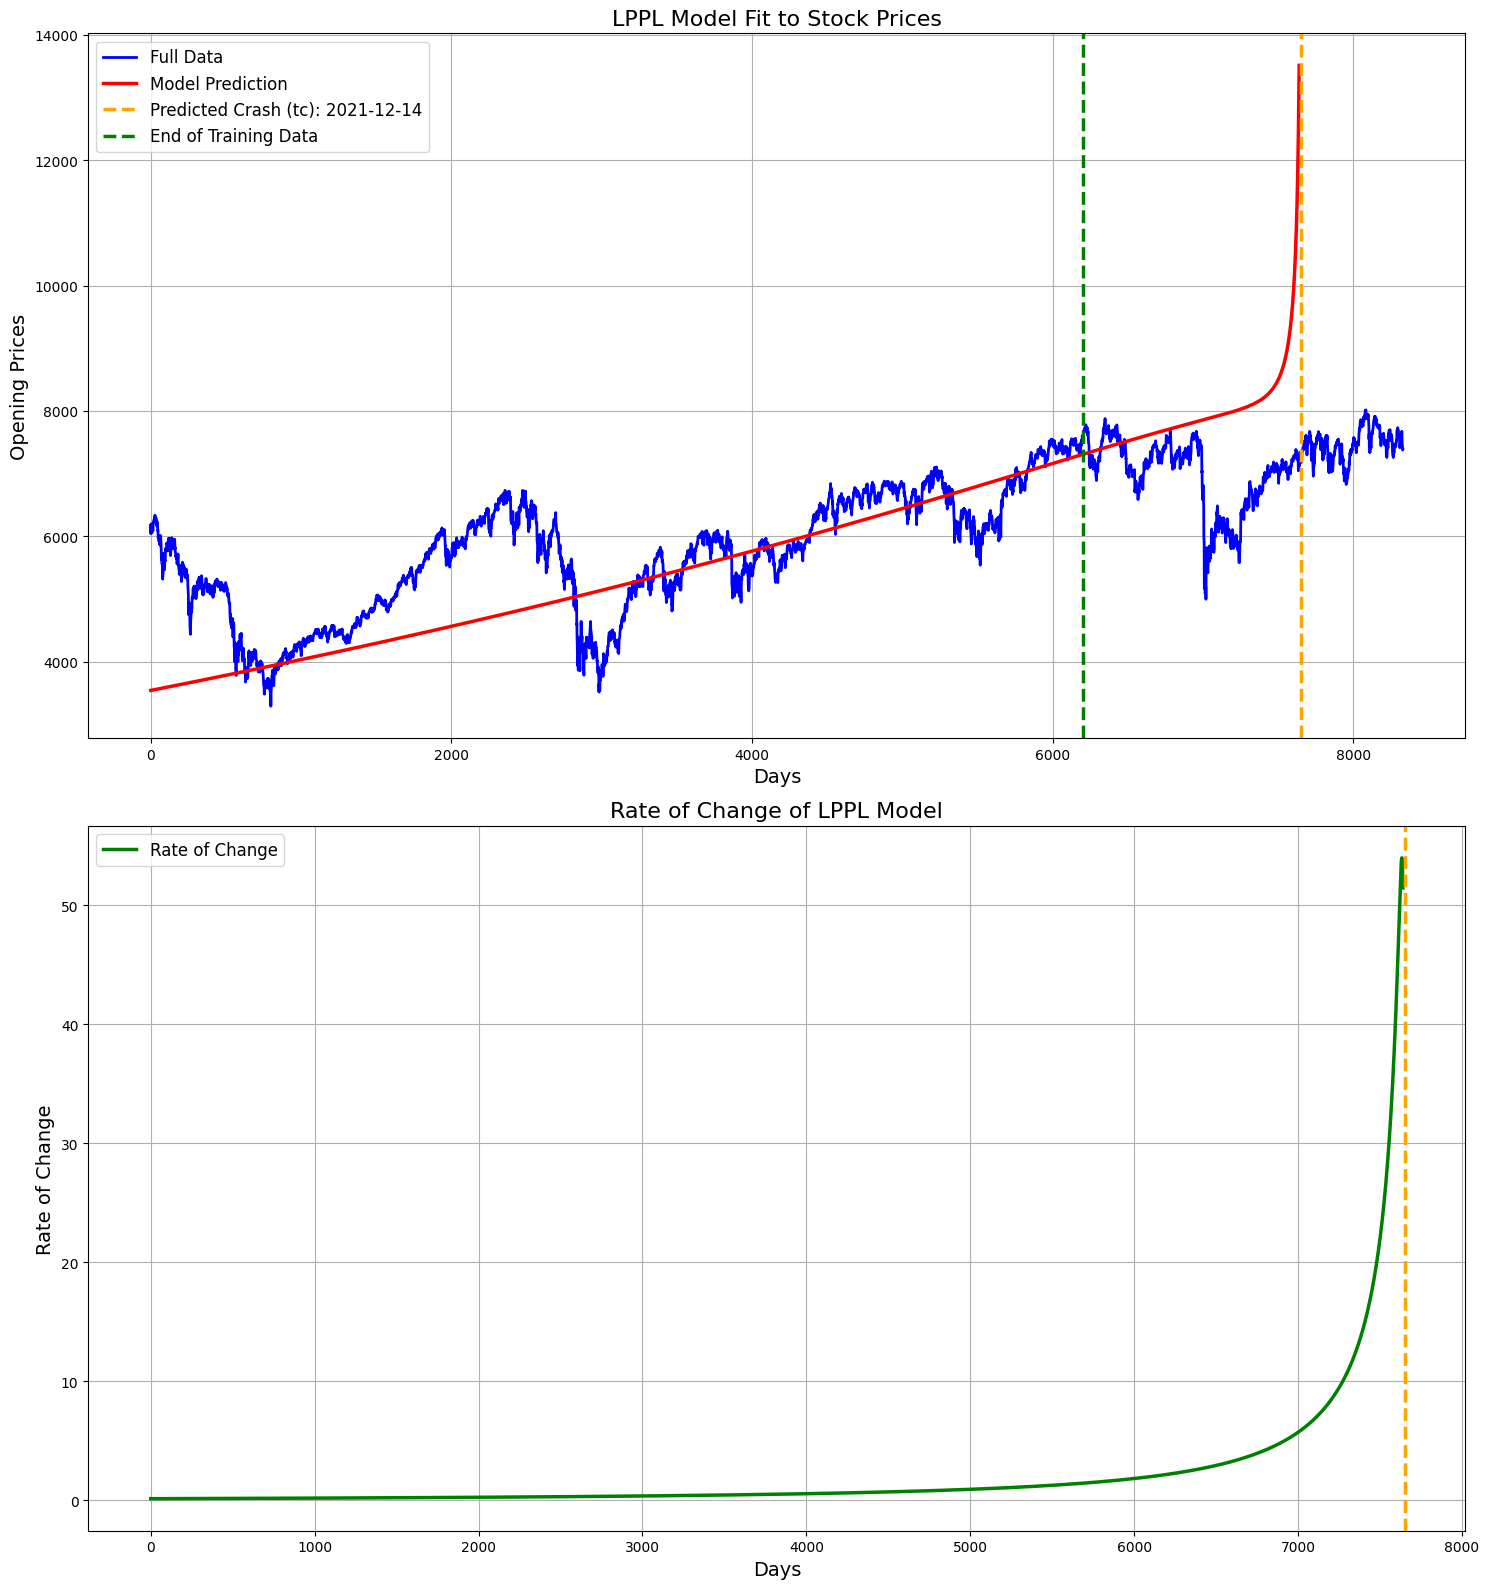

Mean Squared Error: 236639.91238103644
Estimated Parameters:
A: 35095.92484765795
B: -17250.288756453527
C: 1525.555855207068
m: 0.07598186856019327
omega: 0.7195748462709745
phi: 5.829028786074688
tc: 7650.362032890192
Predicted Crash Date: 2021-12-14

Rate of Change Info (days before predicted crash):
30 days before tc: Rate of Change = 50.1718
60 days before tc: Rate of Change = 38.7560
90 days before tc: Rate of Change = 31.0266


In [ ]:
#prediction of historic stock market crash using LPPL
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

#Function to load and preprocess stock data from an Excel file.
def load_data(file_path):
    #Reading the Excel file.
    full_data = pd.read_excel(file_path)

    #Extracting the earliest date from the dataset.
    earliest_date = full_data['Date'].min()


    start_training_date = earliest_date + pd.Timedelta(days=7*365)
    end_training_date = earliest_date + pd.Timedelta(days=17*365)

    #Converting dates to numerical values relative to the earliest date.
    full_data['Date'] = (full_data['Date'] - earliest_date).dt.days

    #Calculating the start and end days in numerical format.
    start_training_days = (start_training_date - earliest_date).days
    end_training_days = (end_training_date - earliest_date).days

    #Extracting dates and prices for the full dataset.
    full_dates, full_prices = full_data['Date'].values, full_data['Open'].values

    #Selecting the training dataset based on the defined period.
    training_data = full_data[(full_data['Date'] >= start_training_days) & (full_data['Date'] <= end_training_days)]
    training_dates, training_prices = training_data['Date'].values, training_data['Open'].values

    return (training_dates, training_prices, full_dates, full_prices, earliest_date)

#Function representing the log-periodic power law.
def log_periodic_power_law(t, A, B, C, m, omega, phi, tc, buffer=10):
    epsilon = 1e-3  # Small number to avoid division by zero.
    mask = (tc - t) >= buffer  # Mask to avoid singularity near critical time.
    output = np.full(t.shape, np.nan)  # Initializing output with NaNs.
    # Applying the LPPL function where valid.
    output[mask] = A + B * (tc - t[mask])**m + C * (tc - t[mask])**m * np.cos(omega * np.log(tc - t[mask] + epsilon) - phi)
    return output

#Objective function for optimization, calculating mean squared error.
def objective_function(params, t, close_prices):
    A, B, C, m, omega, phi, tc = params
    predictions = log_periodic_power_law(t, A, B, C, m, omega, phi, tc)
    return np.mean((close_prices - predictions) ** 2)

#Function to estimate LPPL parameters using differential evolution.
def estimate_parameters(t, close_prices):
    #Defining bounds for the parameters.
    bounds = [(0, 1e5), (-1e5, 0), (-1e5, 1e5), (0, 1), (0, 2 * np.pi), (-2 * np.pi, 2 * np.pi), (17*365, 21*365)]
    #Performing differential evolution optimization.
    result = differential_evolution(objective_function, bounds, args=(t, close_prices), strategy='best1bin', maxiter=40000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7)
    return result

#Function to plot the results.
# Function to plot the results, including the rate of change plot.
def plot_results(t_training, close_prices_training, t_full, close_prices_full, params, earliest_date, end_training_days, future_days=4*365):
    crash_date = earliest_date + pd.Timedelta(days=int(params[-1]))
    t_extended = np.arange(0, max(t_full) + future_days)
    predicted_prices = log_periodic_power_law(t_extended, *params)
    rates_of_change = lppl_rate_of_change(t_extended, *params)

    plt.figure(figsize=(15, 16))

    # Plotting the LPPL fit
    plt.subplot(2, 1, 1)
    plt.plot(t_full, close_prices_full, label='Full Data', color='blue', linewidth=2)
    plt.plot(t_extended, predicted_prices, label='Model Prediction', color='red', linewidth=2.5)
    plt.axvline(x=params[-1], color='orange', linestyle='--', label=f'Predicted Crash (tc): {crash_date.date()}', linewidth=2.5)
    plt.axvline(x=end_training_days, color='green', linestyle='--', label='End of Training Data', linewidth=2.5)
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Opening Prices', fontsize=14)
    plt.title('LPPL Model Fit to Stock Prices', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plotting the rate of change
    plt.subplot(2, 1, 2)
    plt.plot(t_extended, rates_of_change, label='Rate of Change', color='green', linewidth=2.5)
    plt.axvline(x=params[-1], color='orange', linestyle='--', linewidth=2.5)
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Rate of Change', fontsize=14)
    plt.title('Rate of Change of LPPL Model', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main function to analyze stock data.
# Main function to analyze stock data.
def analyze_stock_data(file_path):
    t_training, close_prices_training, t_full, close_prices_full, earliest_date = load_data(file_path)
    end_training_days = t_training[-1]  # Last day of training period
    result = estimate_parameters(t_training, close_prices_training)

    if result.success:
        plot_results(t_training, close_prices_training, t_full, close_prices_full, result.x, earliest_date, end_training_days)

        mse = objective_function(result.x, t_training, close_prices_training)
        print("Mean Squared Error:", mse)

        param_names = ['A', 'B', 'C', 'm', 'omega', 'phi', 'tc']
        print("Estimated Parameters:")
        for name, value in zip(param_names, result.x):
            print(f"{name}: {value}")

        crash_date = earliest_date + pd.Timedelta(days=int(result.x[-1]))
        print("Predicted Crash Date:", crash_date.date())

        print_rate_of_change_info(result.x, earliest_date)

        return result.x, mse
    else:
        print("Parameter estimation did not converge successfully.")
        return None, None

file_path = 'FTSE 100 Historical Data - Checked.xlsx'
estimated_params, mse = analyze_stock_data(file_path)